In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,10)})

In [2]:
df = pd.read_csv("../data/customer_churn_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [4]:
df.shape

(505207, 12)

Le DataFrame contient 505,207 lignes et 12 colonnes, représentant des informations relatives à des clients et leurs comportements. Voici une description des colonnes :
<table><thead><tr><th><strong>Colonne</strong></th><th><strong>Type</strong></th><th><strong>Description</strong></th></tr></thead><tbody><tr><td><strong>CustomerID</strong></td><td><em>float64</em></td><td>Identifiant unique pour chaque client.</td></tr><tr><td><strong>Age</strong></td><td><em>float64</em></td><td>Âge du client.</td></tr><tr><td><strong>Gender</strong></td><td><em>object</em></td><td>Genre du client (par exemple, "Male" ou "Female").</td></tr><tr><td><strong>Tenure</strong></td><td><em>float64</em></td><td>Durée en mois depuis que le client a commencé son abonnement.</td></tr><tr><td><strong>Usage Frequency</strong></td><td><em>float64</em></td><td>Fréquence d'utilisation du service (par exemple, nombre d'interactions ou transactions par période).</td></tr><tr><td><strong>Support Calls</strong></td><td><em>float64</em></td><td>Nombre d'appels passés au service support.</td></tr><tr><td><strong>Payment Delay</strong></td><td><em>float64</em></td><td>Retard moyen dans les paiements, exprimé en jours.</td></tr><tr><td><strong>Subscription Type</strong></td><td><em>object</em></td><td>Type d'abonnement choisi par le client (par exemple, "Basic", "Premium").</td></tr><tr><td><strong>Contract Length</strong></td><td><em>object</em></td><td>Durée du contrat (par exemple, "Monthly", "Yearly").</td></tr><tr><td><strong>Total Spend</strong></td><td><em>float64</em></td><td>Montant total dépensé par le client.</td></tr><tr><td><strong>Last Interaction</strong></td><td><em>float64</em></td><td>Temps (en jours) depuis la dernière interaction du client avec le service.</td></tr><tr><td><strong>Churn</strong></td><td><em>float64</em></td><td>Indicateur binaire montrant si le client a mis fin à son abonnement (1 = Churn, 0 = Non).</td></tr></tbody></table>

In [5]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [6]:
#check if there is any missing values
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
df.dropna(inplace=True)


In [8]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [9]:
# Liste des colonnes à convertir en entier
columns_to_convert = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls','Churn']

# Conversion des colonnes en type int
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Vérification des types après conversion
print(df.dtypes)


CustomerID           float64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object


**Let's start to examine how different features relate to the target column (churn)**

## 1. Relation between Age and Churn :

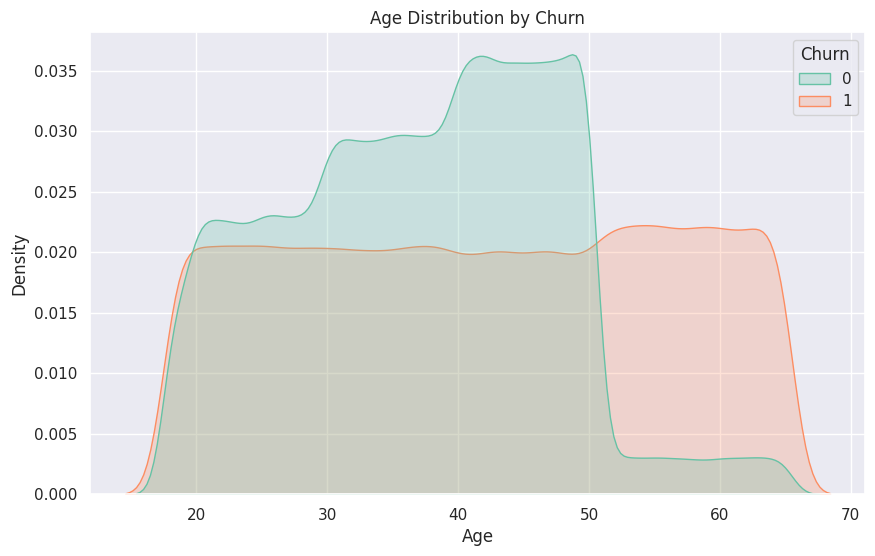

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

### Statistiques descriptive du variable Age 

In [11]:
numerical_columns = ['Age']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Churn                                                              
0      224714.0  36.997201  10.172578  18.0  29.0  38.0  45.0  65.0
1      280492.0  41.872841  13.988755  18.0  30.0  42.0  54.0  65.0

/tmp/ipykernel_24203/3901896187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Age', palette='coolwarm')


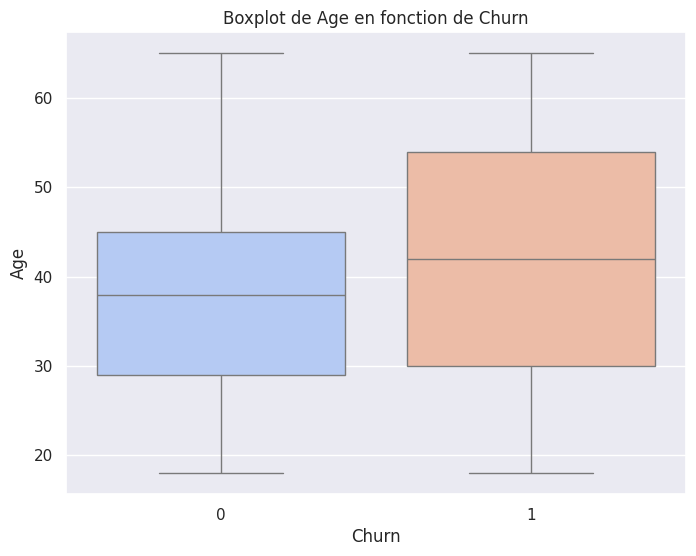

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création du boxplot pour 'Age' en fonction de 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Age', palette='coolwarm')
plt.title('Boxplot de Age en fonction de Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


## 2. Relation between Gneder and Churn :

/tmp/ipykernel_24203/2893446850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')


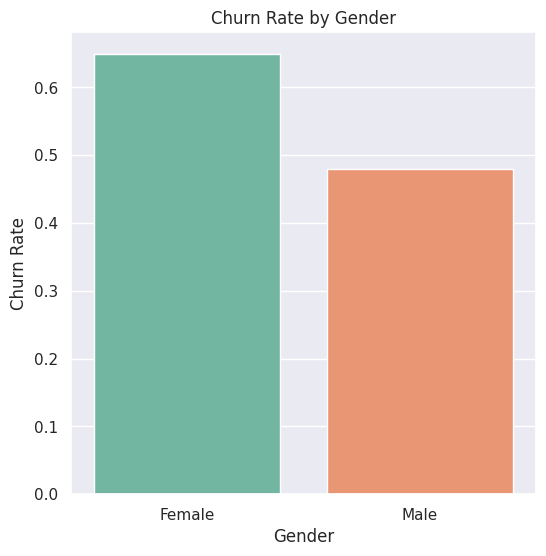

In [13]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

## 3. Relation between Tenure and Churn :

/tmp/ipykernel_24203/3125786845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Tenure', y='Churn', data=df, errorbar=None,  palette='Set2')


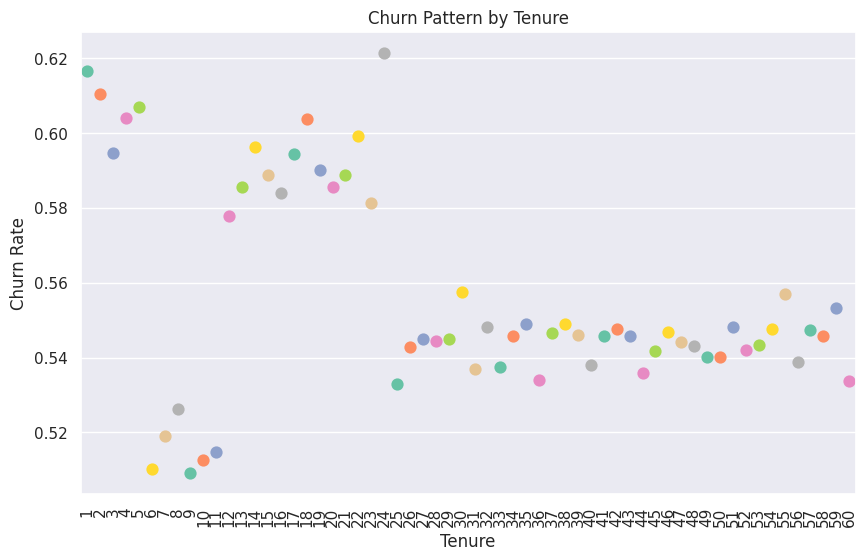

In [14]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Tenure', y='Churn', data=df, errorbar=None,  palette='Set2')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Tenure')
plt.xticks(rotation=90)
plt.show()

## 4. Relation between Usage Frequency and Churn :

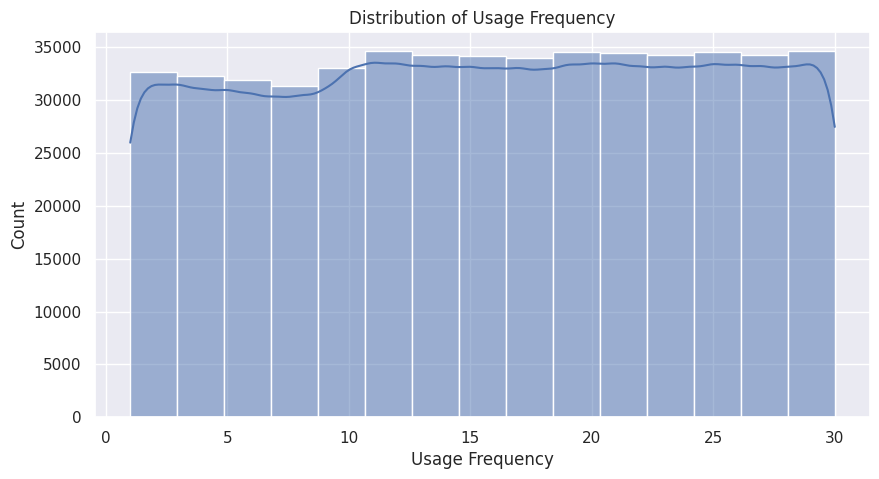

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Usage Frequency'], bins=15, kde=True)
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.show()

### Statistiques descriptive du variable Usage Frequency 

In [16]:
numerical_columns = ['Usage Frequency']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Usage Frequency                                                 
                count       mean       std  min  25%   50%   75%   max
Churn                                                                 
0            224714.0  16.227738  8.440867  1.0  9.0  16.0  23.0  30.0
1            280492.0  15.303909  8.737989  1.0  8.0  15.0  23.0  30.0

## 5. Relation between Support Calls and Churn :

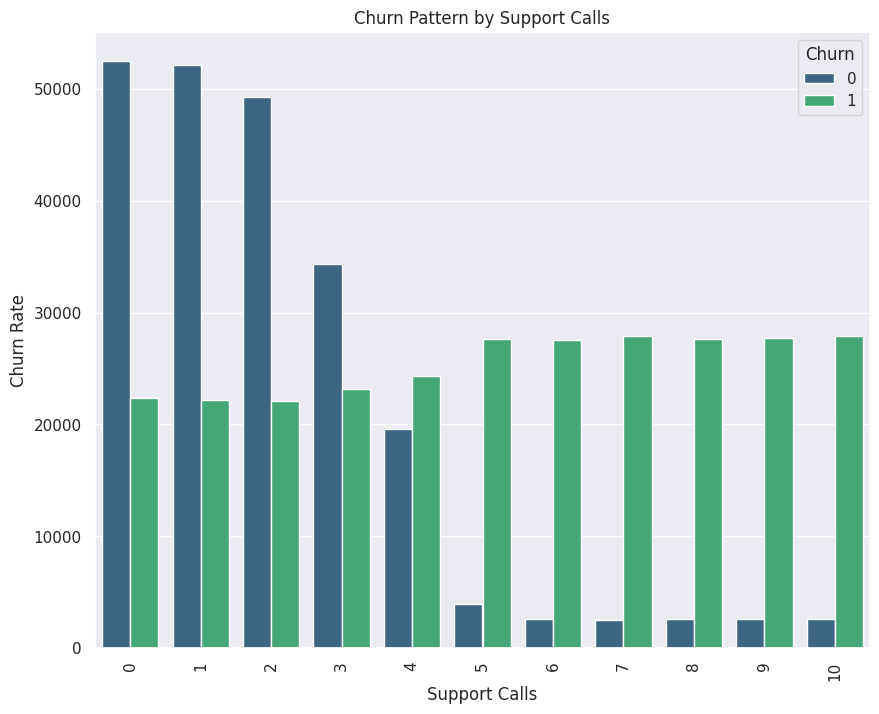

In [17]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , x = 'Support Calls' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Support Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Support Calls')
plt.xticks(rotation=90)
plt.show()

### Statistiques descriptive du variable Support Calls  

In [18]:
numerical_columns = ['Support Calls']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Support Calls                                              
              count      mean       std  min  25%  50%  75%   max
Churn                                                            
0          224714.0  2.025824  2.003345  0.0  1.0  2.0  3.0  10.0
1          280492.0  5.281377  3.123577  0.0  3.0  5.0  8.0  10.0

## 6. Relation between Payment Delay  and Churn :

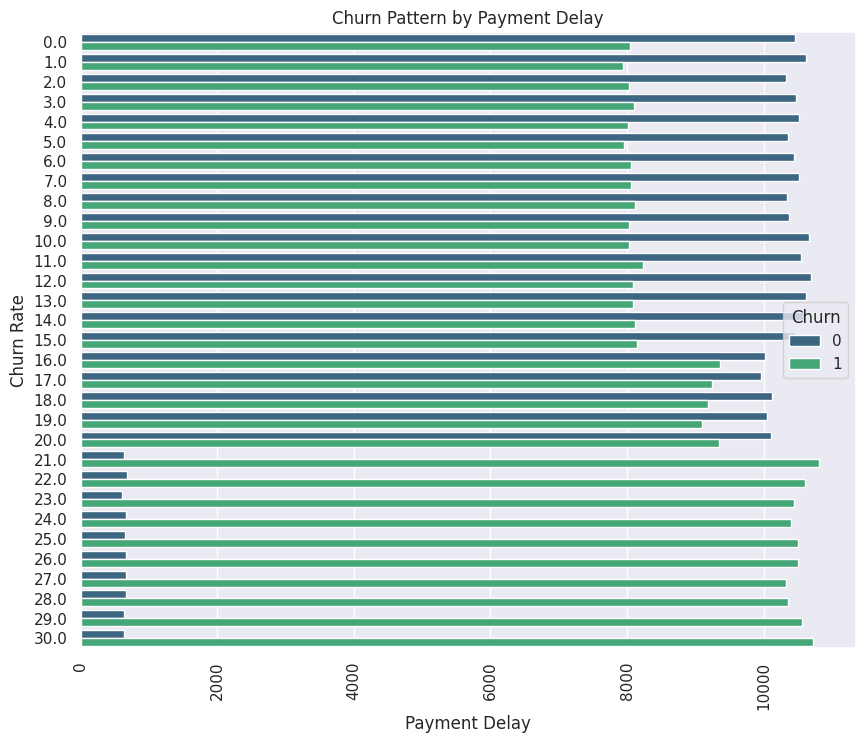

In [19]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , y = 'Payment Delay' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Payment Delay')
plt.xticks(rotation=90)
plt.show()

### Statistiques descriptive du variable Payment Delay  

In [20]:
numerical_columns = ['Payment Delay']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Payment Delay                                                 
              count       mean       std  min  25%   50%   75%   max
Churn                                                               
0          224714.0  10.383025  6.505607  0.0  5.0  10.0  16.0  30.0
1          280492.0  15.991454  8.985814  0.0  8.0  17.0  24.0  30.0

## 7. Relation between Subscription Type  and Churn :

/tmp/ipykernel_24203/4196071330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')


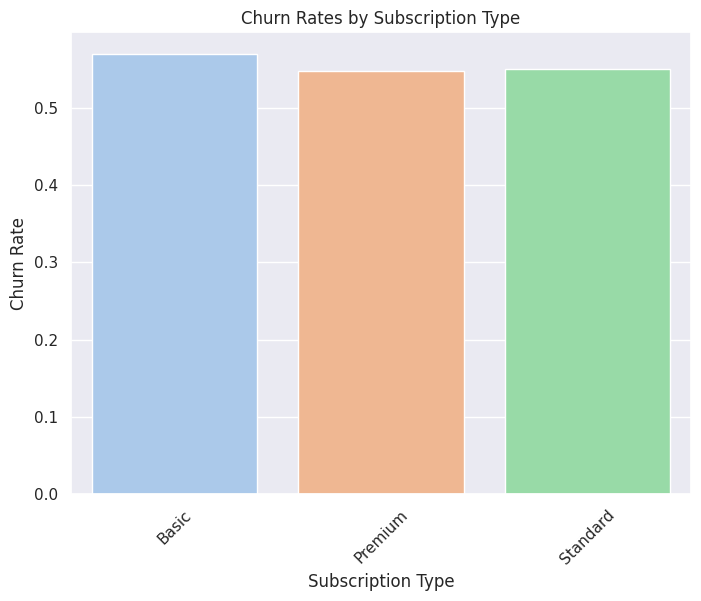

In [21]:
plt.figure(figsize=(8, 6))
subscription_churn_rate = df.groupby('Subscription Type')['Churn'].mean()
sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Subscription Type')
plt.xticks(rotation=45)
plt.show()


## 8. Relation between Payment Contract Length and Churn :

/tmp/ipykernel_24203/2927907959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract Length', y='Churn', data=df, palette='Set3')


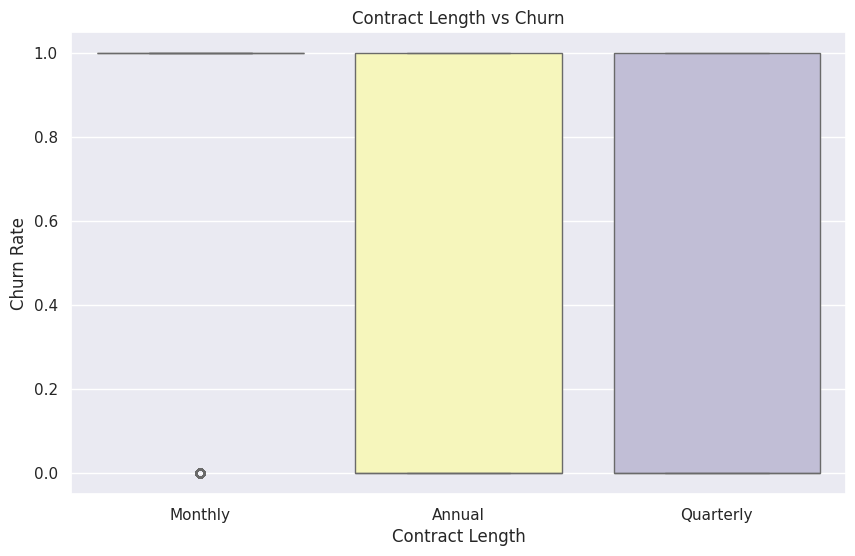

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract Length', y='Churn', data=df, palette='Set3')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Contract Length vs Churn')

plt.show()

## 9. Relation between Payment Contract Length and Churn :

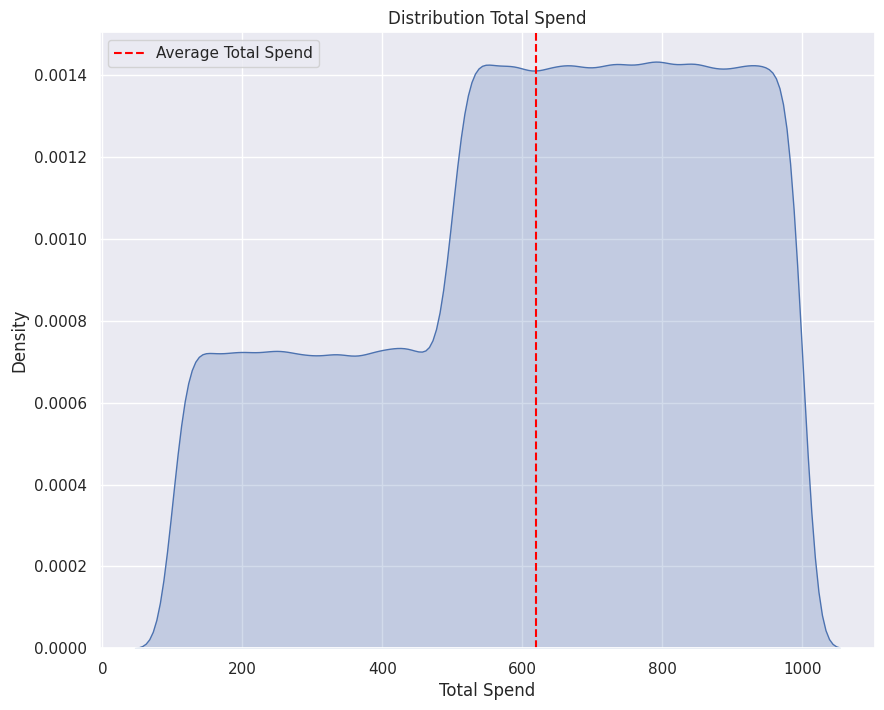

In [23]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total Spend' , fill = True )
plt.title('Distribution Total Spend')
avg_total_spend = df["Total Spend"].mean()
plt.xlabel('Total Spend')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Average Total Spend')
plt.legend()
plt.show()

### Statistiques descriptive du variable Total Spend

In [24]:
numerical_columns = ['Total Spend']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Total Spend                                                          \
            count        mean         std    min     25%     50%      75%   
Churn                                                                       
0        224714.0  721.394858  180.055935  100.0  599.49  733.00  866.480   
1        280492.0  538.899354  260.016780  100.0  313.00  529.43  764.595   

               
          max  
Churn          
0      1000.0  
1      1000.0

## 10. Relation between Payment Last Interaction and Churn :

/tmp/ipykernel_24203/3866459660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Last Interaction', data=df, palette='Set3')


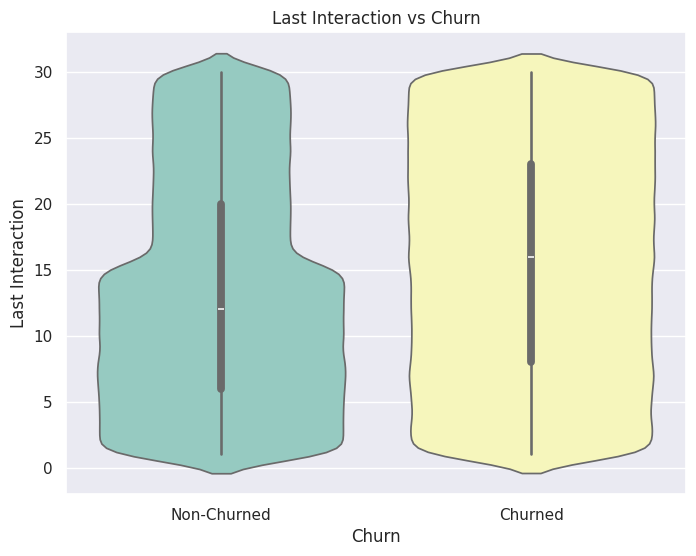

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Last Interaction', data=df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.title('Last Interaction vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

### Statistiques descriptive du variable Last Interaction

In [26]:
numerical_columns = ['Last Interaction']

# Statistiques descriptives par groupe de Churn
stats = df.groupby('Churn')[numerical_columns].describe()
stats

Last Interaction                                                 
                 count       mean       std  min  25%   50%   75%   max
Churn                                                                  
0             224714.0  13.387720  8.390124  1.0  6.0  12.0  20.0  30.0
1             280492.0  15.590266  8.655404  1.0  8.0  16.0  23.0  30.0